## **Predictive model of thrombospondin-1 and vascular endothelial growth factor in breast tumor tissue**

##### **Citation:** Rohrs JA, Sulistio CD, Finley SD. Predictive model of thrombospondin-1 and vascular endothelial growth factor in breast tumor tissue. NPJ Syst Biol Appl. 2016;2:16030–. doi: 10.1038/npjsba.2016.30. Epub 2016 Oct 20. PMID: 28713587; PMCID: PMC5507330.

### **Background**

In this work, the authors investigate a distinctive feature of tumor survival, angiogenesis, which is the formation of new blood capillaries from pre-existing vessels. Inhibition of pro-angiogenic factors has been the primary strategy used to combat angiogenesis, and the vascular endothelial growth factor-A (VEGF), a promoter of angiogenesis, has become an approved target for treatment against various cancer types. However, these treatments have not had long term success, especially in breast tumors. Various preclinical studies have shown that tumors acquire mechanisms of resistance when treated against only a single factor of the angiogenesis signaling network as this allows the tumors to use alternative pathways for growth and vascularization. Thus, the authors aim to further investigate the pro- and anti-angiogenic pathways that are affected by treatment strategies to aid in the future development of multi-modal therapies that may overcome drug resistance. 

One such therapy involves modulating the balance between pro- and anti-angiogenic factors, which has shown success in a preclinical model of pancreatic cancer. This can be achieved by simultaneously mimicking the action of inhibitors while inhibiting promoters. The authors chose to focus this work on the anti-angiogenic factor, thrombospondin-1 (TSP1), which serves multiple functions to inhibit the growth of new blood vessels. 

Due to the complexity of TSP1 signaling and the experimental difficulty involved in measuring the relative distribution of the angiogenic factors in their free and receptor-bound forms, the authors used a predictive systems biology approach to construct a novel, molecular-detailed model of TSP1 and VEGF in breast tumor tissue. The mechanistic model functions to predict the changing concentrations and distributions of these factors under different conditions, providing quantitative insight into the fundamental mechanisms of neovascularization.

The authors apply the model in various ways:

1. to predict the concentrations of these factors and their distributions in breast tumor tissue

2. to predict the effects of altering TSP1’s binding rates on various quantities that characterize the angiogenic state of the tumor

3. to simulate the effects of TSP1 mimetics

### **Computational Model**

The authors constructed a "compartment model" of TSP1, VEGF, and their receptors in a space representing that of a solid breast tumor (Fig. 1). 

![FIG1](Fig1.png)

**Parameters**

The values for the VEGF secretion rates, receptor densities, kinetic parameters, and the concentration of ECM binding sites were chosen based on previous models involving these molecular types/interactions.

**Model Implementation**

The authors used BioNetGen to construct the reaction network, and our work to transform this model to PySB is shown below.

The baseline model (shown in Fig. 1) is composed of 18 molecule types and 92 reaction rules, which totals to 130 molecular species based on 488 reactions. In all, the model contains 130 non-linear ordinary differential equations (ODEs) that predict the concentration of each species over time. 

To perform the analysis described in the three points above, the authors ran 5,000 Monte Carlo (MC) simulations for all cases (i.e., baseline model, each change to the TSP1 unbinding rates, and each TSP1 mimetic).

**The following code shows our model conversion from BioNetGen to PySB:**

In [1]:
from pysb.importers.bngl import model_from_bngl

In [2]:
model1 = model_from_bngl('TSP1_model_baseline_orig.bngl', force=False, cleanup=True)

In [3]:
# uncomment these lines of codes to view parameter values, reaction rules, or observables, respectably

#model.parameters
#model.rules
#model.observables

### **Paper Results and Conclusions**

The following code uses the converted model and original parameters to explore the concentration/distribution of the TSP1 and VEGF species, as done in the paper. The primary species of importance for this analysis are as follows:

**TSP1_free:** Uncleaved TSP1, yet still unbound to a receptor

**VEGF_free:** Uncleaved VEGF, yet still unbound to a receptor

**TSP1_RECbound:** TSP1 is bound to a receptor and is promoting anti-angiogenic signaling

**VEGF_RECbound:** VEGF is bound to a receptor and is participating in pro-angiogenic complexes

**TSP1_cleaved:** cleaved form of TSP1, unable to bind to receptors

**VEGF_cleaved:** cleaved isoform of VEGF (VEGF114), unable to bind receptors

In [4]:
from pysb.simulator import ScipyOdeSimulator
import pylab as pl

In [5]:
# The paper views changes over a course of 10 days, which we also use here

t = pl.linspace(0, 100000, 110000)

In [6]:
simres = ScipyOdeSimulator(model1, tspan=t, compiler='python').run()
yout = simres.all

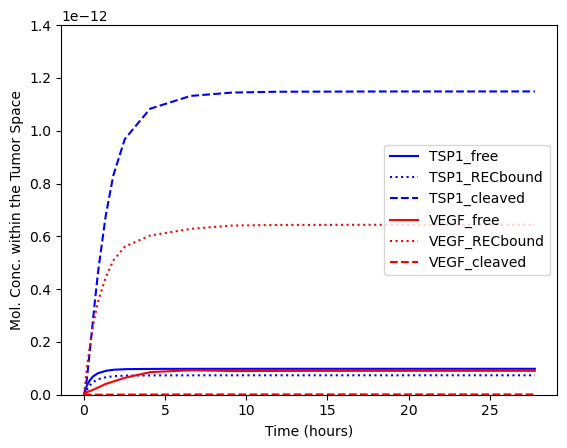

In [7]:
pl.ion()
pl.figure()

pl.plot(t/3600, yout['TSP1_free'], label="TSP1_free", color='blue')
pl.plot(t/3600, yout['TSP1_RECbound'], label="TSP1_RECbound", color='blue', linestyle='dotted')
pl.plot(t/3600, yout['Obs_TSP1_cleaved'], label="TSP1_cleaved", color='blue', linestyle='--')
pl.plot(t/3600, yout['V165'] +  yout['V121'], label="VEGF_free", color='red')
pl.plot(t/3600, yout['VEGF_RECbound'], label="VEGF_RECbound", color='red', linestyle='dotted')
pl.plot(t/3600, yout['Obs_V114'], label="VEGF_cleaved", color='red', linestyle='--')

pl.legend(loc='center right')
pl.xlabel("Time (hours)")
pl.ylabel("Mol. Conc. within the Tumor Space")
pl.ylim(0, 1.4e-12)
pl.show()

##### Figure 1. **Output from original model parameters allowing the system to reach steady state.** TSP1, blue; VEGF, red; uncleaved and unbound proteins, solid lines; cleaved proteins, dashed lines; dotted lines, proteins bound to receptor.

The main findings of the baseline model are outlined below:

1. nearly all unbound VEGF is in one of its active forms, and receptor-bound VEGF is participating in pro-angiogenic complexes 
2. although the majority of receptor-bound TSP1 is promoting anti-angiogenic signaling, receptor-bound TSP1 comprises only a small percentage of total TSP1
3. a large percentage of TSP1 is in an inactive form

Altogether, these predictions indicate that the tumor is significantly shifted towards a pro-angiogenic state.

The additional analysis conducted in this work simulated administration of TSP1 mimetics that bind with specific targets. The model predicted that the CD47-binding TSP1 mimetic markedly decreases the ratio of receptor-bound VEGF to receptor-bound TSP1, in favor of anti-angiogenesis. In this way, the authors used the model to guide the development of new anti-angiogenic drugs.

We aim to contribute additional analysis to further this development.

### **Novel Analysis**

The author's primarily focused their _in silico_ experimentation on mimetic binding of TSP1 to its different receptors, effectively solving the problem that arises from finding (2). However, we wonder if the proteases involved in molecular cleavage can be used to shift the angiogenic balance. There are two points to consider:

1. a large percentage of TSP1 is in an inactive form within the normal tumor environment, and
2. TSP1 has some pro-angiogenic properties that effectively inhibit the cleavage of VEGF

**Question 1:** If inhibitors of TSP1 cleavage can be administrated into the tumor environment to decrease the cleavage rates of active TSP1, will there be more receptor-bound TSP1?

_Caveat:_ The authors never reveal what molecular species is responsible for cleavage of TSP1. 

**Question 2:** How does this inhibition of TSP1 cleavage affect the cleavage rates of VEGF?

To answer these questions, we decrease the cleavage rate of TSP1 by a factor of 10.

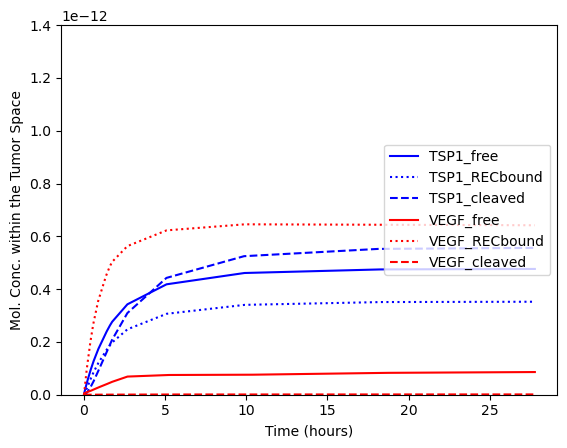

In [8]:
model2 = model_from_bngl('TSP1_model_baseline_edit.bngl', force=False, cleanup=True)

simres = ScipyOdeSimulator(model2, tspan=t, compiler='python').run()
yout = simres.all

pl.ion()
pl.figure()

pl.plot(t/3600, yout['TSP1_free'], label="TSP1_free", color='blue')
pl.plot(t/3600, yout['TSP1_RECbound'], label="TSP1_RECbound", color='blue', linestyle='dotted')
pl.plot(t/3600, yout['Obs_TSP1_cleaved'], label="TSP1_cleaved", color='blue', linestyle='--')
pl.plot(t/3600, yout['V165'] +  yout['V121'], label="VEGF_free", color='red')
pl.plot(t/3600, yout['VEGF_RECbound'], label="VEGF_RECbound", color='red', linestyle='dotted')
pl.plot(t/3600, yout['Obs_V114'], label="VEGF_cleaved", color='red', linestyle='--')

pl.legend(loc='center right')
pl.xlabel("Time (hours)")
pl.ylabel("Mol. Conc. within the Tumor Space")
pl.ylim(0, 1.4e-12)
pl.show()

There was seemingly no change to the molecule concentrations, which we found odd. So, to test whether the cleaved species is truly having an effect, we increased the cleavage rate by a factor of 10.

In [9]:
model3 = model_from_bngl('TSP1_model_baseline_edit.bngl', force=False, cleanup=True)

In [10]:
model3.parameters['k_TSP1cleave'].value = 0.0386

In [11]:
print(f"{model1.parameters['k_TSP1cleave']} model1 TSP1 cleavage rate")
print(f"{model2.parameters['k_TSP1cleave']} model2 TSP1 cleavage rate")
print(f"{model3.parameters['k_TSP1cleave']} model3 TSP1 cleavage rate")



Parameter('k_TSP1cleave', 0.00386) model1 TSP1 cleavage rate
Parameter('k_TSP1cleave', 0.000386) model2 TSP1 cleavage rate
Parameter('k_TSP1cleave', 0.0386) model3 TSP1 cleavage rate


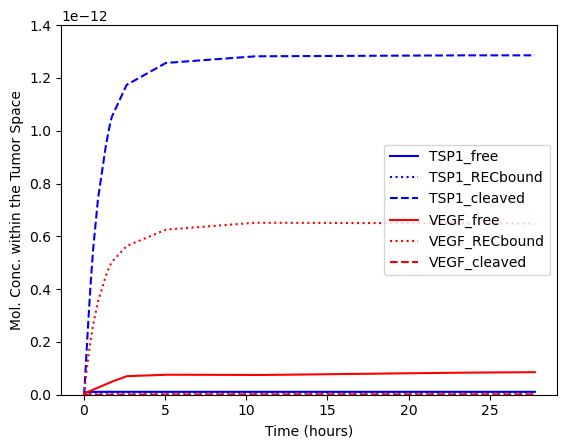

In [12]:

simres = ScipyOdeSimulator(model3, tspan=t, compiler='python').run()
yout = simres.all

pl.ion()
pl.figure()

pl.plot(t/3600, yout['TSP1_free'], label="TSP1_free", color='blue')
pl.plot(t/3600, yout['TSP1_RECbound'], label="TSP1_RECbound", color='blue', linestyle='dotted')
pl.plot(t/3600, yout['Obs_TSP1_cleaved'], label="TSP1_cleaved", color='blue', linestyle='--')
pl.plot(t/3600, yout['V165'] +  yout['V121'], label="VEGF_free", color='red')
pl.plot(t/3600, yout['VEGF_RECbound'], label="VEGF_RECbound", color='red', linestyle='dotted')
pl.plot(t/3600, yout['Obs_V114'], label="VEGF_cleaved", color='red', linestyle='--')

pl.legend(loc='center right')
pl.xlabel("Time (hours)")
pl.ylabel("Mol. Conc. within the Tumor Space")
pl.ylim(0, 1.4e-12)
pl.show()

We found that changing the cleavage rate does indeed affect the molecular concentrations in the system. Here, as the concentration of cleaved TSP1 increased, the concentration of free, yet active, TSP1 decreased (which would be expected). All VEGF concentrations still remained the same.

### **Biological Interpretation of Results**

**Question 1:** These results indicate that decreasing the cleavage rate of TSP1 resulted in an effectively zero value in the number of cleaved TSP1 species, yet there was no increase in the amount of receptor-bound TSP1. Thus, it is necessary to determine how to increase the binding of active TSP1 species to their associated receptors, for the authors showed that mimetic therapies for receptor binding had anti-angiogenic effects. Is there a way to take advantage of the endogenous TSP1 and increase binding?

**Question 2:** We originally worried that increasing cleavage of TSP1 would also have a pro-angiogenic effect on the system because active TSP1 inhibits the cleavage of VEGF. However, as with Q1, we found no change in the amount of cleaved VEGF species. 

These findings are interesting in that inibiting cleavage of TSP1 from active to inactive seems to have no affect on the system's interactions. Perhaps there are other components in the network that play a role in how active TSP1 interacts with its environment. 